<a href="https://colab.research.google.com/github/Vincenzo-Miracula/TallerPratico/blob/main/Extracci%C3%B3ndeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping

### [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
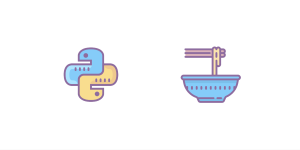
---
* BeautifulSoup 4 (bs4) es una libreria de Python utilizada para el web scraping y el análisis de páginas web HTML/XML.
* Proporciona una forma sencilla de extraer datos específicos de páginas web, permitiendo a los desarrolladores navegar a través del marcado HTML, identificar elementos deseados y acceder a su contenido o atributos.
* Es ampliamente utilizada para extraer información de sitios web.
---




In [ ]:
from bs4 import BeautifulSoup as bs
import requests

In [ ]:
headers = {"user-agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.53 Safari/537.36"}
url = requests.get('', headers)
soup = bs(url.content, 'html.parser')

# API

### Mastodon

### YouTube